# Customer Churn Analysis

In [1]:
#lets import necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import the dataset
df=pd.read_csv('Telecom_customer_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Pre-processing

In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
df.shape

(7043, 21)

In [6]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [9]:
df.tenure.unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39], dtype=int64)

In [10]:
df.MultipleLines.unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [11]:
df.InternetService.unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [12]:
df.OnlineSecurity.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [13]:
df.OnlineBackup.unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [14]:
df.DeviceProtection.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [15]:
df.TechSupport.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [16]:
df.StreamingTV.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [17]:
df.StreamingMovies.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [18]:
df.Contract.unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [19]:
df.PaperlessBilling.unique()

array(['Yes', 'No'], dtype=object)

In [20]:
df.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [21]:
df.MonthlyCharges.nunique()

1585

In [22]:
df.TotalCharges.nunique()

6531

In [23]:
df.Churn.unique()

array(['No', 'Yes'], dtype=object)

## Checking the duplicates

In [24]:
#  check  the duplicate
duplicate = df[df.duplicated()]
print("Duplicate Rows :")
 
#  Print the resultant Dataframe
duplicate

Duplicate Rows :


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [25]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## EDA and Visualization

Male      3555
Female    3488
Name: gender, dtype: int64
********************


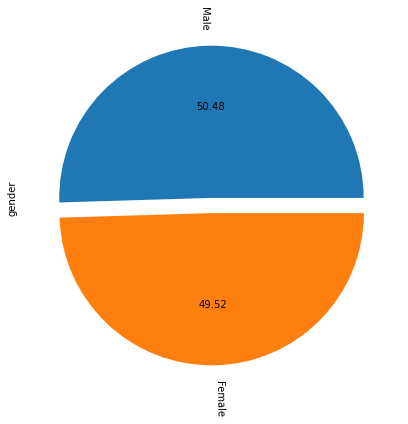

In [26]:
plt.figure(figsize=(7,7))
df['gender'].value_counts().plot(kind='pie',autopct = '%.2f' , rotatelabels = True,explode = [0,0.1])
print(df.gender.value_counts())
print('*'*20)
plt.show()

## From the Above count plot, we observe the ratio for males and females is almost equal. the males in the dataset are 3555 and the female in the dataset are 3488.

In [27]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

0    5901
1    1142
Name: SeniorCitizen, dtype: int64
********************


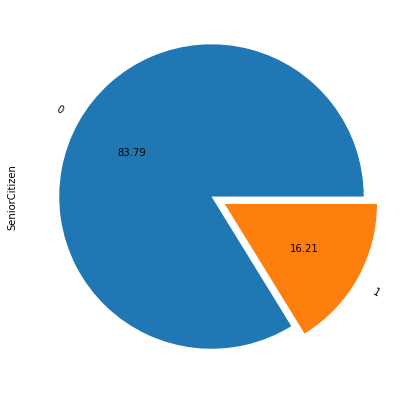

In [28]:
plt.figure(figsize=(7,7))
df['SeniorCitizen'].value_counts().plot(kind='pie',autopct = '%.2f' , rotatelabels = True,explode = [0,0.1])
print(df.SeniorCitizen.value_counts())
print('*'*20)
plt.show()

## From the above count plot, we observe senior citizens are less which is 1142 in the count and the rest are normal Citizens with a count of 5901.

No     3641
Yes    3402
Name: Partner, dtype: int64
********************


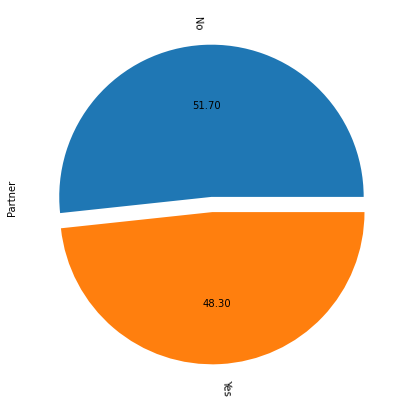

In [29]:
plt.figure(figsize=(7,7))
df['Partner'].value_counts().plot(kind='pie',autopct = '%.2f' , rotatelabels = True,explode = [0,0.1])
print(df.Partner.value_counts())
print('*'*20)
plt.show()

## From the above count plot, we observe 48.30% which is 3402 people who are married having a partner and 51.70% are single.

No     4933
Yes    2110
Name: Dependents, dtype: int64
********************


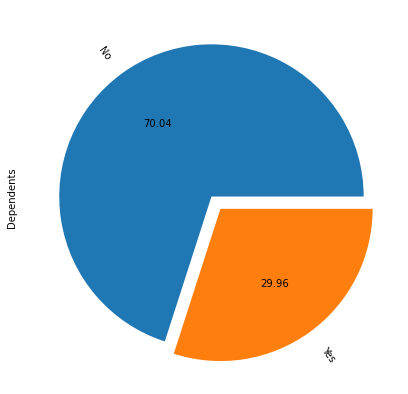

In [30]:
plt.figure(figsize=(7,7))
df['Dependents'].value_counts().plot(kind='pie',autopct = '%.2f' , rotatelabels = True,explode = [0,0.1])
print(df.Dependents.value_counts())
print('*'*20)
plt.show()

## From the above count plot, we observe that almost 30% of people are dependent count for it is 2110, and the rest 70% are independent count that is 4933.

Yes    6361
No      682
Name: PhoneService, dtype: int64
********************


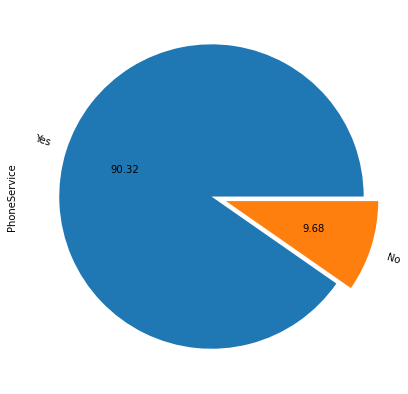

In [31]:
plt.figure(figsize=(7,7))
df['PhoneService'].value_counts().plot(kind='pie',autopct = '%.2f' , rotatelabels = True,explode = [0,0.1])
print(df.PhoneService.value_counts())
print('*'*20)
plt.show()

## From the above count plot, we observe that 6361 which is 90.31% of people say that it provides good phone services, and 682 which is 9.68% people say that it does not provide good services.

In [32]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
********************


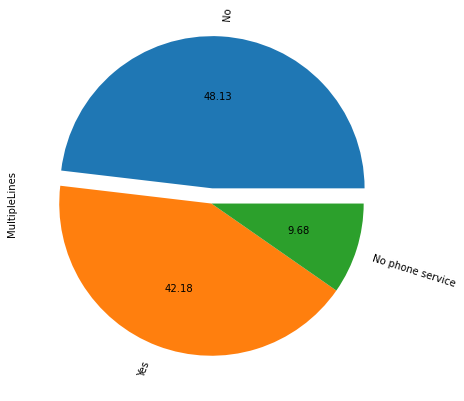

In [33]:
plt.figure(figsize=(7,7))
df['MultipleLines'].value_counts().plot(kind='pie',autopct = '%.2f' , rotatelabels = True,explode = [0.1,0,0])
print(df.MultipleLines.value_counts())
print('*'*20)
plt.show()

## From the above count plot, we observe 42.18% which is 2971 people use multiple line phone calls, 48.13% 3390 people does not uses multiple line phone call and only 9.68% which is 682 people the service is not provided.

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
********************


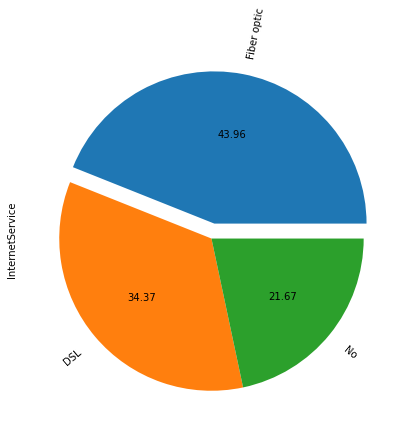

In [34]:
plt.figure(figsize=(7,7))
df['InternetService'].value_counts().plot(kind='pie',autopct = '%.2f' , rotatelabels = True,explode = [0.1,0,0])
print(df.InternetService.value_counts())
print('*'*20)
plt.show()

## From the above count plot, we observe 43.96% which is 3096 people use Fiber optic as internet service, 34.37 % which is 2421 people use DSL(Digital subscriber line) internet service, and 21.67% which is 1526 do not use internet service.

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
********************


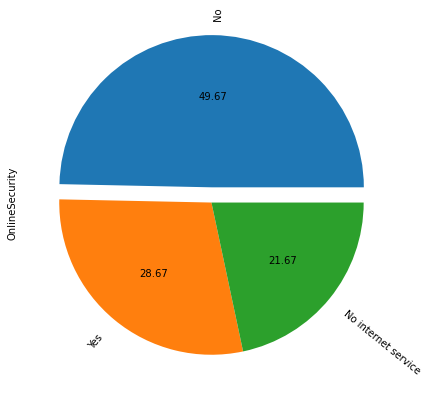

In [35]:
plt.figure(figsize=(7,7))
df['OnlineSecurity'].value_counts().plot(kind='pie',autopct = '%.2f' , rotatelabels = True,explode = [0.1,0,0])
print(df.OnlineSecurity.value_counts())
print('*'*20)
plt.show()

## From the above count plot, we observe 2019 people which is 28.67% people use Online security whereas 3498 people which is 49.67% do not usees online security, and 21.67% which is 1526 people the online security is not provided as they do not have internet service.

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64
********************


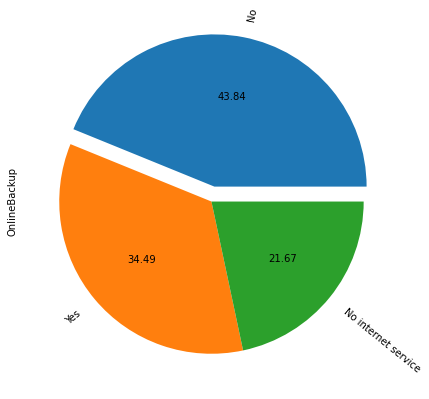

In [36]:
plt.figure(figsize=(7,7))
df['OnlineBackup'].value_counts().plot(kind='pie',autopct = '%.2f' , rotatelabels = True,explode = [0.1,0,0])
print(df.OnlineBackup.value_counts())
print('*'*20)
plt.show()

## From the above count plot, we observe 34.49% of people which is 2429 people have their online backup where as 43.84% of people which is 3088 people do not have online backup, and 21.67% of people which is 1526 people do not have internet service so they don't have any backup.

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64
********************


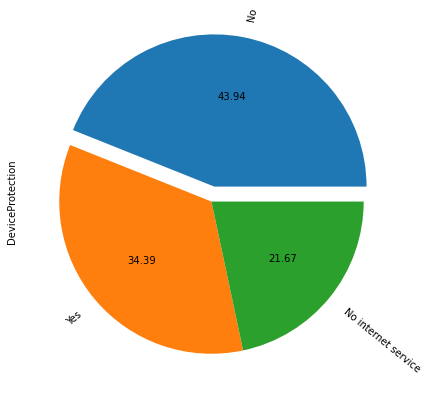

In [37]:
plt.figure(figsize=(7,7))
df['DeviceProtection'].value_counts().plot(kind='pie',autopct = '%.2f' , rotatelabels = True,explode = [0.1,0,0])
print(df.DeviceProtection.value_counts())
print('*'*20)
plt.show()

## From the above count plot, we observe that 34.39% of people which is 2422 people have Device protection ON where as 43.94% people which is 3095 people do not turn their Device protection ON and 21.67% people which is 1526 people do not have internet service.

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64
********************


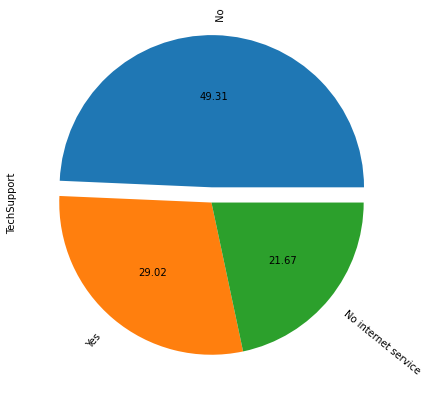

In [38]:
plt.figure(figsize=(7,7))
df['TechSupport'].value_counts().plot(kind='pie',autopct = '%.2f' , rotatelabels = True,explode = [0.1,0,0])
print(df.TechSupport.value_counts())
print('*'*20)
plt.show()

## From the above count plot, we observe 29.02% of people which is 2044people use the TechSupport whereas 49.31% of people which is 3473 people Do not use tech Support, and 21.67% people which is 1526 people do not have internet service.

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64
********************


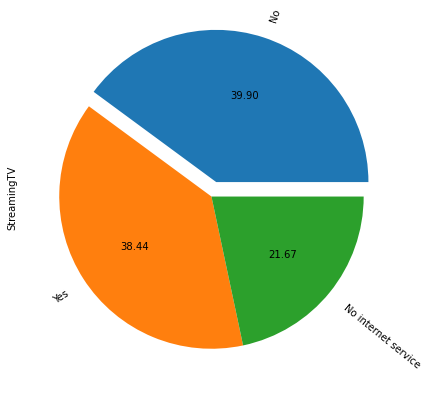

In [39]:
plt.figure(figsize=(7,7))
df['StreamingTV'].value_counts().plot(kind='pie',autopct = '%.2f' , rotatelabels = True,explode = [0.1,0,0])
print(df.StreamingTV.value_counts())
print('*'*20)
plt.show()

## From the above count plot, we observe 38.44% of people 2707 people use the internet to stream tv whereas 39.90% which is 2810 people do use the internet for streaming TV whereas 21.67% people which is 1526 people do not have internet service.

In [40]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64
********************


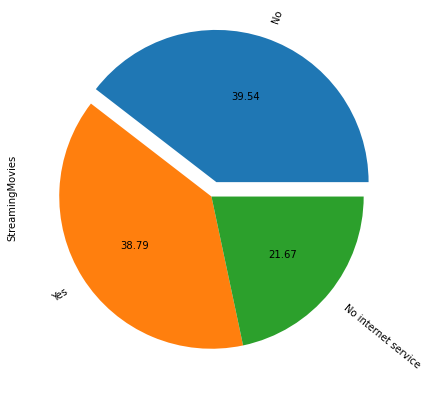

In [41]:
plt.figure(figsize=(7,7))
df['StreamingMovies'].value_counts().plot(kind='pie',autopct = '%.2f' , rotatelabels = True,explode = [0.1,0,0])
print(df.StreamingMovies.value_counts())
print('*'*20)
plt.show()

## From the above count plot, we observe 38.79% of people 2732 people uses the internet to stream Movies whereas 39.54% which is 2785 people do use the internet for streaming Movies where as 21.67% of people which is 1526 people do not have internet service.

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64
********************


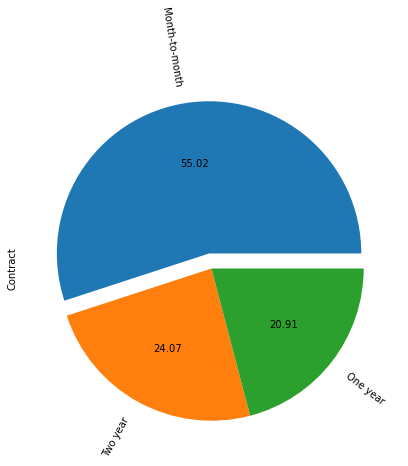

In [42]:
plt.figure(figsize=(7,7))
df['Contract'].value_counts().plot(kind='pie',autopct = '%.2f' , rotatelabels = True,explode = [0.1,0,0])
print(df.Contract.value_counts())
print('*'*20)
plt.show()

## From the above count plot, we observe 55.02% of people which is 3875 users have a contract month to month whereas 24.07% of people which is 1695 users have a contract for 2 years, and 20.91% people which is 1473 users have a contract for 1 year.

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64
********************


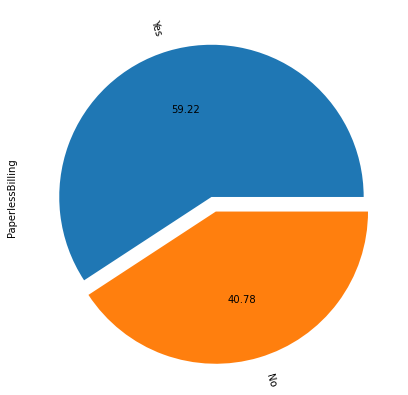

In [43]:
plt.figure(figsize=(7,7))
df['PaperlessBilling'].value_counts().plot(kind='pie',autopct = '%.2f' , rotatelabels = True,explode = [0,0.1])
print(df.PaperlessBilling.value_counts())
print('*'*20)
plt.show()

## From the above count plot, we observe 59.22% of people which is 4171 users ok which paperless billing(Online generated bills) whereas 40.78% of people which is 2872 user wants paper billing.

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64
********************


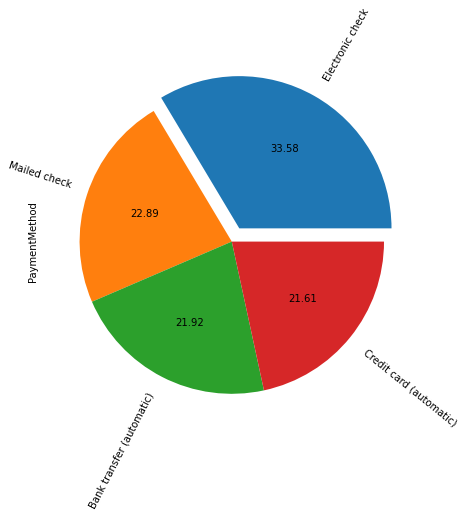

In [44]:
plt.figure(figsize=(7,7))
df['PaymentMethod'].value_counts().plot(kind='pie',autopct = '%.2f' , rotatelabels = True,explode = [0.1,0,0,0])
print(df.PaymentMethod.value_counts())
print('*'*20)
plt.show()

## From the above count plot, we observe 33.58% of people which is 2365 user use the payment option as an Electronic Check followed by 22.89% of people 1612 user uses the payment option as a Mailed check option followed by 21.92% of people is1544 user uses payment option as Bank transfer and at last 21.61% people which is 1522 user uses payment option as a Credit card.

No     5174
Yes    1869
Name: Churn, dtype: int64
********************


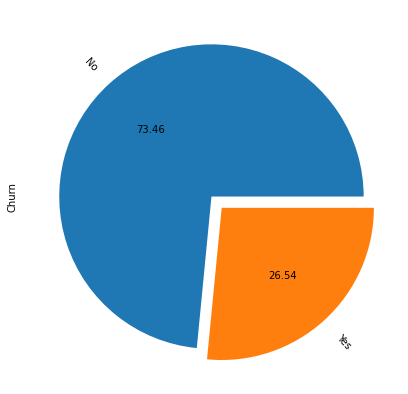

In [45]:
plt.figure(figsize=(7,7))
df['Churn'].value_counts().plot(kind='pie',autopct = '%.2f' , rotatelabels = True,explode = [0,0.1])
print(df.Churn.value_counts())
print('*'*20)
plt.show()

## From the above count plot, we observe 73.46% of people which is 5174 users are still present which means the services provided by the company is good whereas 26.54% of people which is 1869 user left the company, and from this ratio, we observe that our dataset is the imbalanced dataset.

In [46]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### Checkinf the datatypes of all columns

In [47]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [48]:
df.loc[df['TotalCharges']==' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [49]:
df['TotalCharges']=df['TotalCharges'].replace(" ",np.nan)

In [50]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [51]:
df['TotalCharges']=df['TotalCharges'].astype(float)

In [52]:
df['TotalCharges'].mean()

2283.3004408418697

## Filling the nulls values by Mean 

In [54]:
df['TotalCharges'].fillna(2283.3004408418697 , inplace=True)

In [55]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

## Applying Label Encoder to categorical columns

In [56]:
from sklearn.preprocessing import LabelEncoder

In [57]:
le=LabelEncoder()
df1=le.fit_transform(df['gender'])
pd.Series(df1)

0       0
1       1
2       1
3       1
4       0
       ..
7038    1
7039    0
7040    0
7041    1
7042    1
Length: 7043, dtype: int32

In [58]:
df['gender']=df1

In [59]:
df2=le.fit_transform(df['Partner'])
pd.Series(df2)
df['Partner']=df2

In [60]:
df3=le.fit_transform(df['Dependents'])
pd.Series(df3)
df['Dependents']=df3

In [61]:
df4=le.fit_transform(df['PhoneService'])
pd.Series(df4)
df['PhoneService']=df4

In [62]:
df.dtypes

customerID           object
gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [63]:
df5=le.fit_transform(df['MultipleLines'])
pd.Series(df5)
df['MultipleLines']=df5

In [64]:
df6=le.fit_transform(df['InternetService'])
pd.Series(df6)
df['InternetService']=df6

In [65]:
df7=le.fit_transform(df['OnlineSecurity'])
pd.Series(df7)
df['OnlineSecurity']=df7

In [66]:
df8=le.fit_transform(df['OnlineBackup'])
pd.Series(df8)
df['OnlineBackup']=df8

In [67]:
df9=le.fit_transform(df['DeviceProtection'])
pd.Series(df9)
df['DeviceProtection']=df9

In [68]:
df10=le.fit_transform(df['TechSupport'])
pd.Series(df10)
df['TechSupport']=df10

In [69]:
df.dtypes

customerID           object
gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [70]:
df11=le.fit_transform(df['StreamingTV'])
pd.Series(df11)
df['StreamingTV']=df11

In [71]:
df12=le.fit_transform(df['StreamingMovies'])
pd.Series(df12)
df['StreamingMovies']=df12

In [72]:
df13=le.fit_transform(df['Contract'])
pd.Series(df13)
df['Contract']=df13

In [73]:
df14=le.fit_transform(df['PaperlessBilling'])
pd.Series(df14)
df['PaperlessBilling']=df14

In [74]:
df15=le.fit_transform(df['PaymentMethod'])
pd.Series(df15)
df['PaymentMethod']=df15

In [75]:
df17=le.fit_transform(df['Churn'])
pd.Series(df17)
df['Churn']=df17

In [76]:
df.dtypes

customerID           object
gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges        float64
Churn                 int32
dtype: object

In [77]:
def graphs(x_feature,y_label,df):
    
    print(df[[x_feature, y_label]].groupby([x_feature], as_index=False).mean().sort_values(by=y_label, ascending=False))
    print('\n')
    print(df[x_feature].value_counts())
    print( "\n")
    sns.countplot(x=x_feature,hue=y_label,data = df)
    plt.figure(figsize = (15, 5))

   gender  Dependents
1       1    0.304360
0       0    0.294725


1    3555
0    3488
Name: gender, dtype: int64




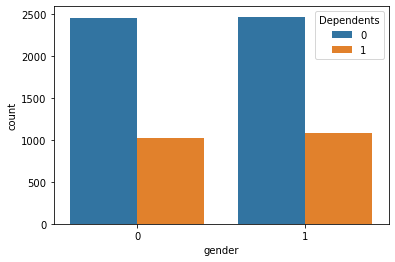

<Figure size 1080x360 with 0 Axes>

In [78]:
graphs('gender','Dependents',df)

## So from the above graph, we observe both males and females are almost equal in the count so for the dependent. 

In [79]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

   gender  SeniorCitizen
0       0       0.162844
1       1       0.161463


1    3555
0    3488
Name: gender, dtype: int64




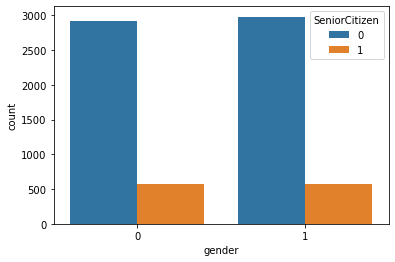

<Figure size 1080x360 with 0 Axes>

In [80]:
graphs('gender','SeniorCitizen',df)

## The senior citizen from both males and females are equal in the above graph.

    tenure    gender
44      44  0.666667
51      51  0.602941
27      27  0.597222
24      24  0.595745
19      19  0.589041
..     ...       ...
15      15  0.424242
55      55  0.421875
28      28  0.421053
41      41  0.385714
48      48  0.328125

[73 rows x 2 columns]


1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64




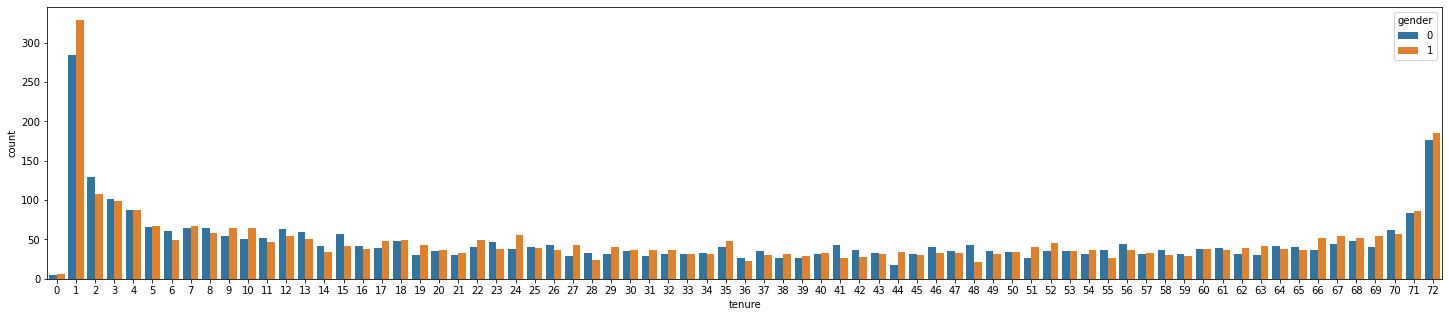

<Figure size 1080x360 with 0 Axes>

In [81]:
plt.figure(figsize=(25,5))
graphs('tenure','gender',df)

## From the above graph popular tenure is for 1 month followed by 72 months and for 1 month the male count same is for 72-month tenure.

   gender  PhoneService
0       0      0.905103
1       1      0.901266


1    3555
0    3488
Name: gender, dtype: int64




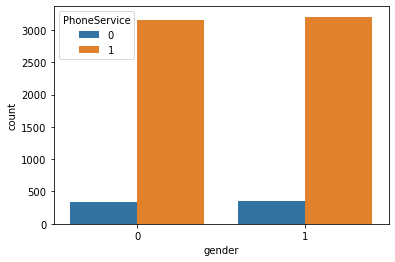

<Figure size 1080x360 with 0 Axes>

In [82]:
graphs('gender','PhoneService',df)

## From the above graph, we observe that the phone service is mostly used by both males and females.

   MultipleLines    gender
1              1  0.514663
0              0  0.507080
2              2  0.499832


0    3390
2    2971
1     682
Name: MultipleLines, dtype: int64




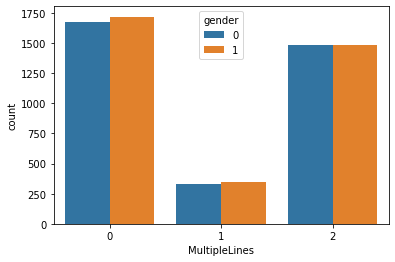

<Figure size 1080x360 with 0 Axes>

In [83]:
graphs('MultipleLines','gender',df)

## From the above graph, we observe that both males and females have an equal count in all the categories in Multiple lines yes, no, and no phone services.

   InternetService    gender
2                2  0.510485
0                0  0.509294
1                1  0.498385


1    3096
0    2421
2    1526
Name: InternetService, dtype: int64




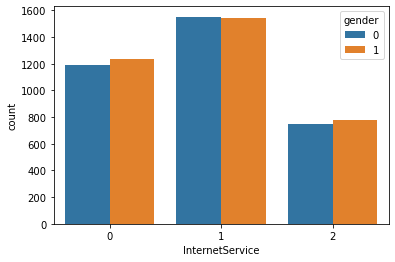

<Figure size 1080x360 with 0 Axes>

In [84]:
graphs('InternetService','gender',df)

## From the above graph, we observe that both males and females have an equal count in all the categories of Intenet services yes, no, and no phone services.

   OnlineSecurity    gender
1               1  0.510485
0               0  0.510006
2               2  0.491332


0    3498
2    2019
1    1526
Name: OnlineSecurity, dtype: int64




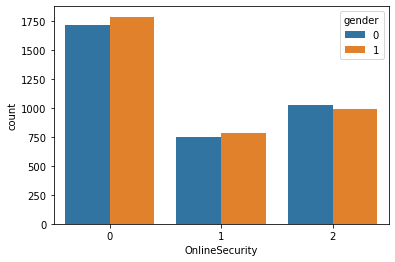

<Figure size 1080x360 with 0 Axes>

In [85]:
graphs('OnlineSecurity','gender',df)

## From the above graph, we observe that both males and females have an equal count in all the categories in Online security yes, no, and no phone services.

   gender  OnlineBackup
0       0      0.917144
1       1      0.895921


1    3555
0    3488
Name: gender, dtype: int64




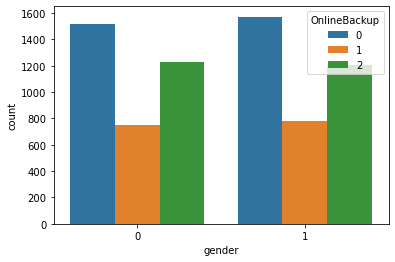

<Figure size 1080x360 with 0 Axes>

In [86]:
graphs('gender','OnlineBackup',df) 

## From the above graph we observe both males and females have an equal number of counts for online backup yes, no, and no internet services.

In [87]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

   gender     Churn
0       0  0.269209
1       1  0.261603


1    3555
0    3488
Name: gender, dtype: int64




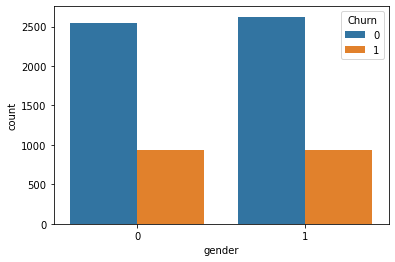

<Figure size 1080x360 with 0 Axes>

In [88]:
graphs('gender','Churn',df)

## From the above graph, we observe the churn rate is equal for both males and females.

   gender  PaymentMethod
1       1       1.592686
0       0       1.555619


1    3555
0    3488
Name: gender, dtype: int64




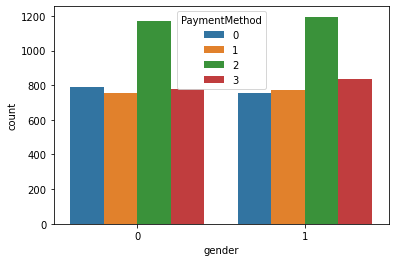

<Figure size 1080x360 with 0 Axes>

In [89]:
graphs('gender','PaymentMethod',df)

## From the above graph, we observe both males and females prefer the same payment option which is an electronic check.

## Splitting the label and feature to apply SMOTE

In [90]:
# seperate label n feature
X=df.drop(['Churn' , 'customerID'], axis=1)
y=df.Churn

In [91]:
from sklearn.model_selection import train_test_split,GridSearchCV

In [92]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.75,random_state=41)

In [93]:
#to see how much data is going to y_train set
from collections import Counter
Counter(y_train)

Counter({1: 1405, 0: 3877})

## Import SMOTE

In [94]:
#balancing the dataset using upsampling or Oversampling technique (SMOTE)
from imblearn.over_sampling import SMOTE


In [95]:
# coding for SMOTE
ove_smp=SMOTE(0.75)  # how much extra data you want
X_train_ns,y_train_ns=ove_smp.fit_resample(X_train,y_train)
print('the number of classes before fit: ',format(Counter(y_train)))
print('the number of classes after fit: ',format(Counter(y_train_ns)))


# and for future we pass X_train_ns,X_test,y_train_ns,y_test=train_test_split

the number of classes before fit:  Counter({0: 3877, 1: 1405})
the number of classes after fit:  Counter({0: 3877, 1: 2907})


In [96]:
#describe dataset
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,2283.300441,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,2265.000258,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,402.225000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1400.550000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,3786.600000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


## Observations

1] The dataset contains 7043 Rows and 21 Columns 

2] we replace ' ' with np.nan and we treat null values by mean

3] there are no duplicates in the dataset

4] We see problem in tenure and Monthlycharges and totalcharges as Maximumn value is much higer than 75%

## Plotting the heatmap to observe Co-relation

In [97]:
corr=df.corr()
corr.shape

(20, 20)

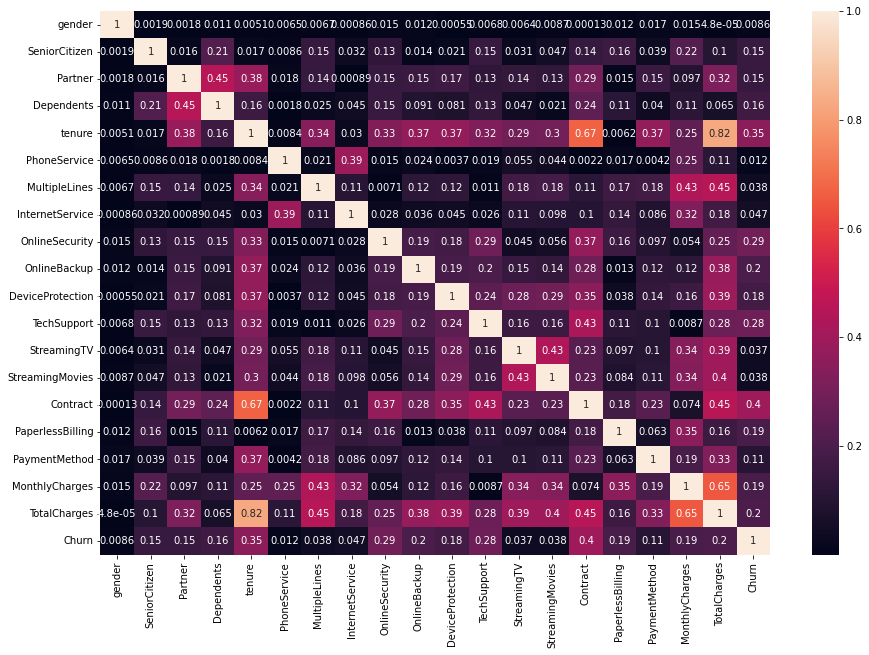

In [98]:
corr=df.corr().abs()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True)
plt.show()

## From the heat map, we observe tenure vs total charge as having high relation and thus I suspect that there is a problem of multi-colinearity and the remaining feature are also having positive and negative co-relation with our label.

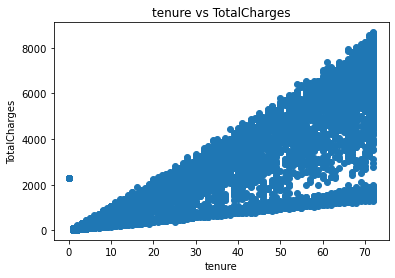

In [99]:
plt.scatter(df['tenure'],df['TotalCharges'])
plt.xlabel('tenure')
plt.ylabel('TotalCharges')
plt.title('tenure vs TotalCharges')
plt.show()

## So by plotting 2nd proof which is a scatter plot we observe that there is a multi-colinearity that exists we will delete one of the features and that feature is total charge because it contributes less to our label as compared to tenure.

## Plotting Histogram plot to see how data is distributed on an interval scale

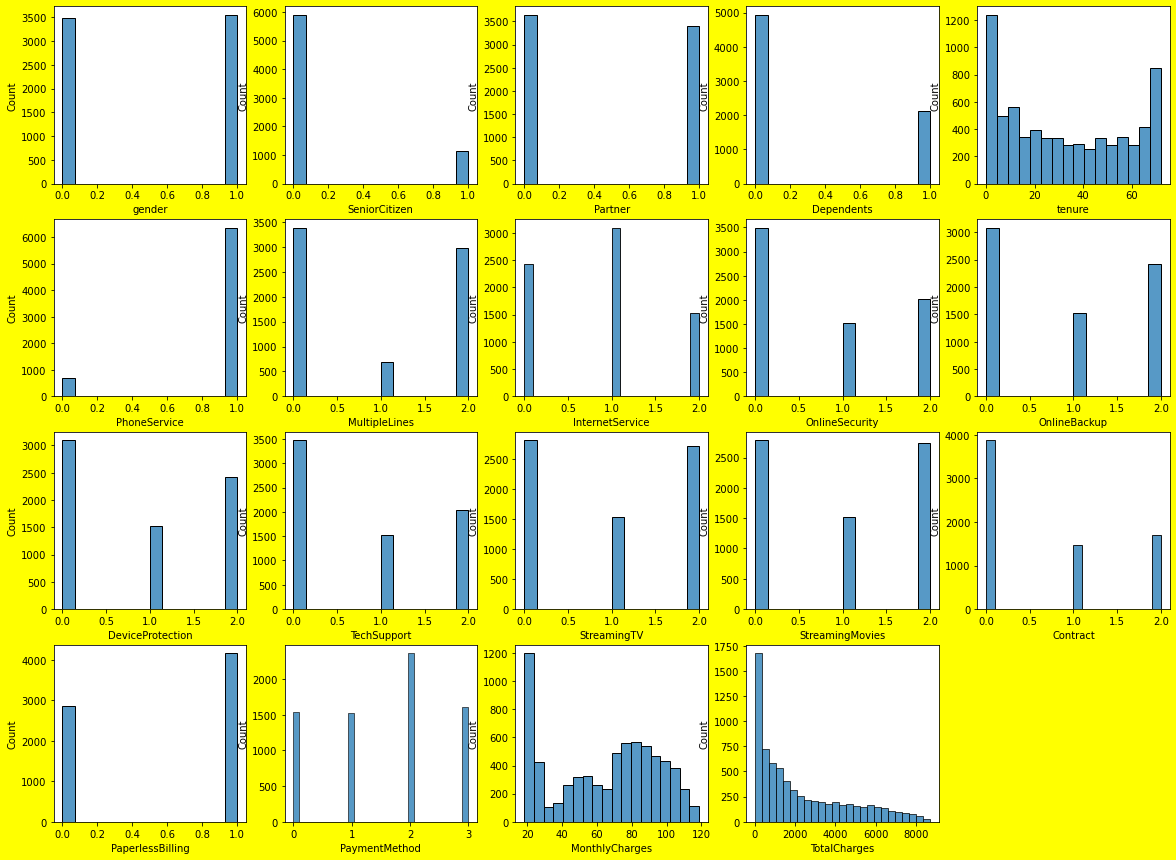

In [100]:
# now lets see how data is distributed for every column 

plt.figure(figsize=(20,15) , facecolor = 'yellow')
plotnumber = 1

for column in X:
    if plotnumber <= 20:
        ax = plt.subplot(4,5,plotnumber)
        sns.histplot (X[column])
        plt.xlabel(column , fontsize=10)
        
    plotnumber += 1
plt.show()

## so here our continious data is only Monthlycharges and totalcharges and we observe skewness

## Plotting Distribution plot to see how data is distributed

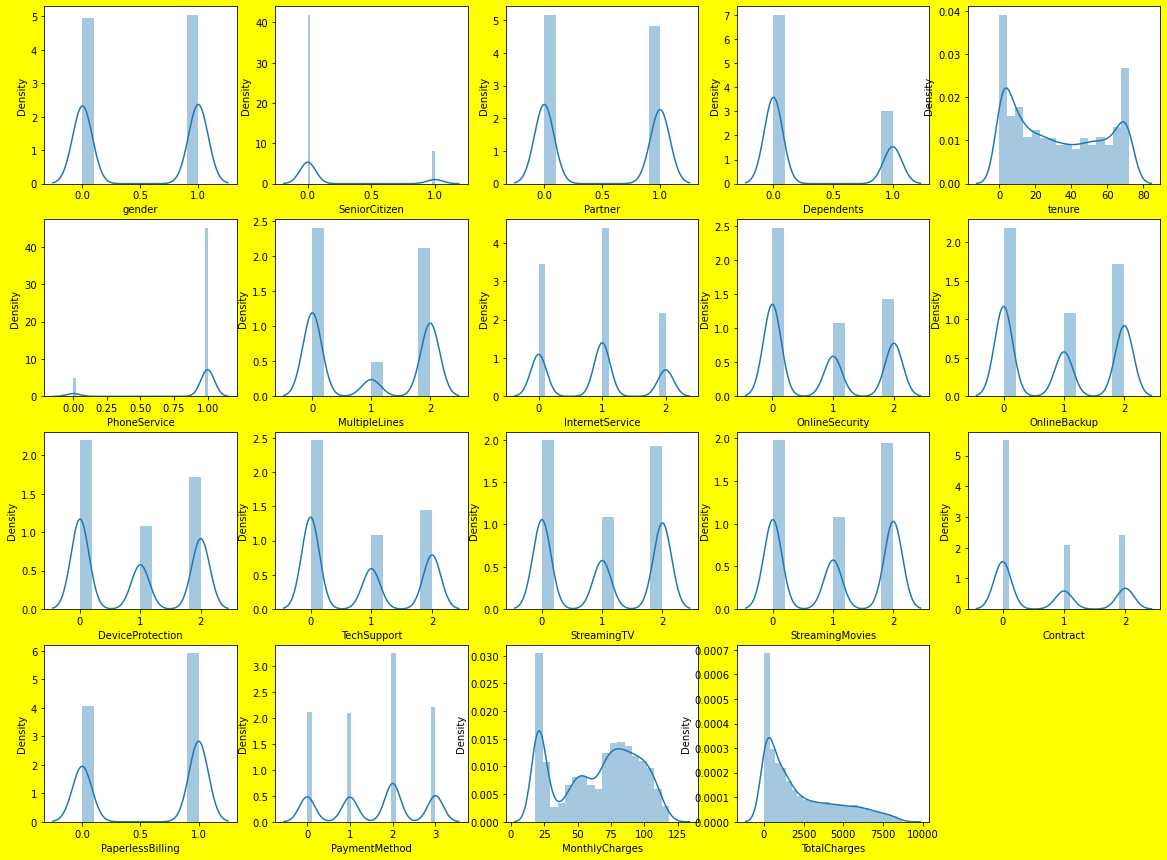

In [101]:
# now lets see how data is distributed for every column 

plt.figure(figsize=(20,15) , facecolor = 'yellow')
plotnumber = 1

for column in X:
    if plotnumber <= 20:
        ax = plt.subplot(4,5,plotnumber)
        sns.distplot (X[column])
        plt.xlabel(column , fontsize=10)
        
    plotnumber += 1
plt.show()

## so here our continious data is only Monthlycharges and totalcharges and we observe skewness

## Plotting Scatter plot to see realtion between feature and label

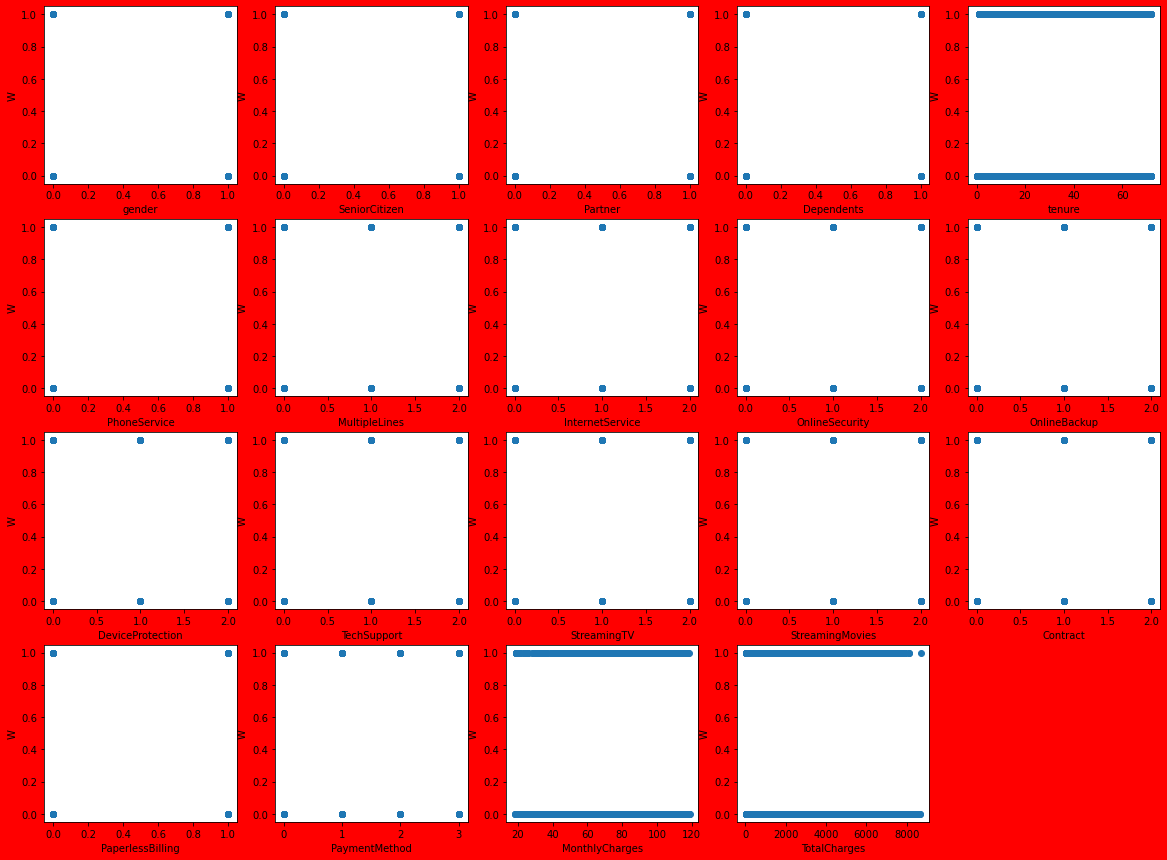

In [102]:
# so find relationship between feature(X) and label(y) by visulization using scatter plot

plt.figure(figsize = (20,15) , facecolor = 'red')
plotnumber = 1

for column in X:   #here feature is new X so X
    if plotnumber <= 20:
        ax = plt.subplot(4,5,plotnumber)
        plt.scatter(X[column] , y)
        plt.xlabel(column , fontsize = 10)
        plt.ylabel('W' , fontsize = 10)
    plotnumber += 1
plt.show()

## Plotting Regression plot to see realtion between feature and label

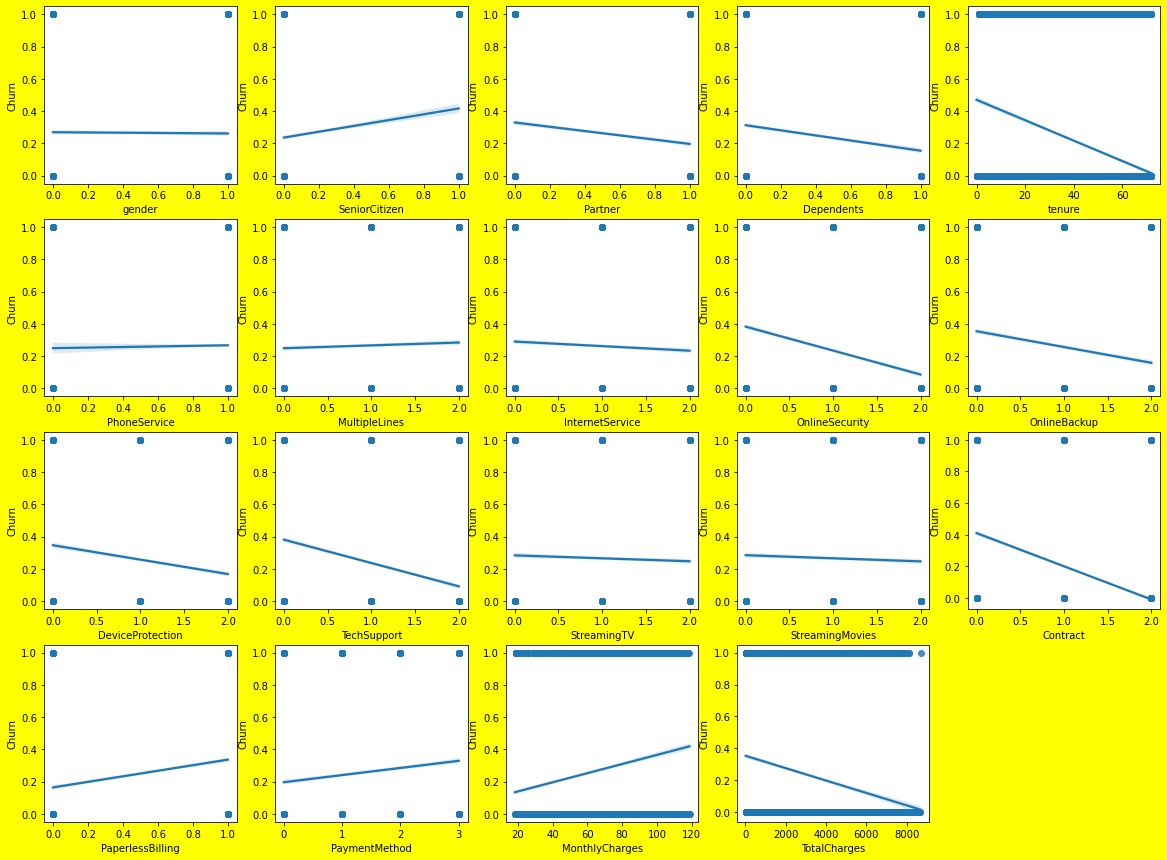

In [103]:
# now lets see how data is distributed for every column 

plt.figure(figsize=(20,15) , facecolor = 'yellow')
plotnumber = 1

for column in X:
    if plotnumber <= 20:
        ax = plt.subplot(4,5,plotnumber)
        sns.regplot (X[column],y)
        plt.xlabel(column , fontsize=10)
        
    plotnumber += 1
plt.show()

## From above Scatter plot and Regression plot we observe that most of the feature are negatively co-related to our label and some of feature are positively co-related.

## Plotting Box plot to see outliers are present are not

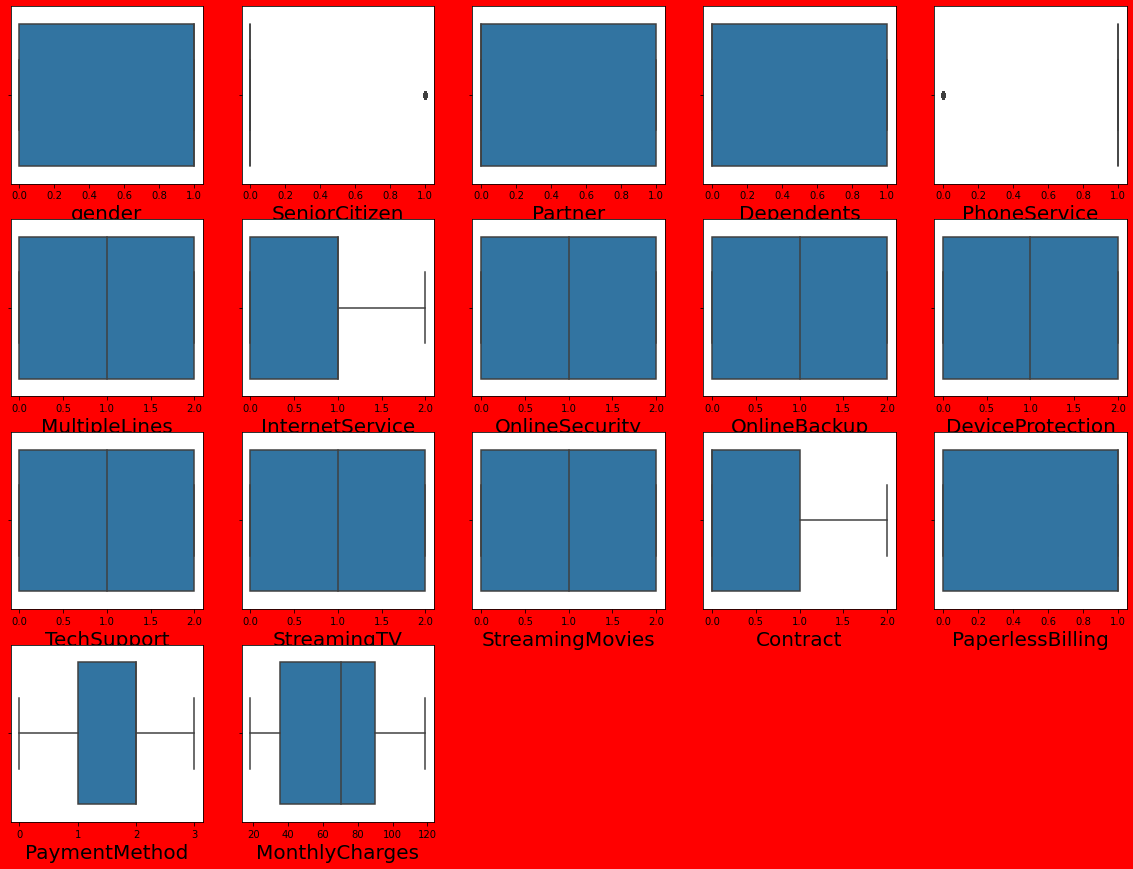

In [93]:
plt.figure(figsize=(20,15) , facecolor = 'red')
graph = 1

for column in X:
    
    if graph <= 20:
        plt.subplot (4,5,graph)
        ax = sns.boxplot(X[column])
        plt.xlabel(column , fontsize = 20)
        
    graph += 1
    
plt.show()

## So we dont see any outliers but Seniour citizen and phone service column has outliers 

## Treating Outliers with Z-score Method

In [94]:
# we will go with 3 std
# from scipy import stats

from scipy.stats import zscore

In [95]:
# new code for deleting outlier here we take std = 3
z_score = zscore(X)
abs_z_score = np.abs(z_score)

filtering_entry = (abs_z_score < 2.8 ).all(axis=1)

df1 = df[filtering_entry]

df1.describe()



,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
count,6361.000000,6361.000000,6361.000000,6361.000000,6361.0,6361.000000,6361.000000,6361.000000,6361.000000,6361.000000,6361.000000,6361.000000,6361.000000,6361.000000,6361.000000,6361.000000,6361.000000,6361.000000
mean,0.503694,0.163182,0.485930,0.299324,1.0,0.934130,0.966515,0.785726,0.913378,0.905518,0.791699,1.001415,1.005188,0.691086,0.594875,1.572866,67.199041,0.267096
std,0.500026,0.369561,0.499841,0.457998,0.0,0.997907,0.715712,0.845162,0.867592,0.866771,0.846655,0.871905,0.871891,0.834212,0.490955,1.068744,30.449604,0.442478
min,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,44.750000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.0,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,74.700000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,1.0,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,91.250000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.0,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,1.000000


In [96]:
df1.shape

(6361, 19)

### Dataloss by removing outliers

In [97]:
dataloss=((7043-6358)/7043)*100
dataloss

9.725969047280989

## Finding correlation between feature n lable using CORR method

In [98]:
#  (code type      --   feature corrwith label)

df.drop('Churn' , axis =1 ).corrwith (df.Churn)

gender             -0.008612
SeniorCitizen       0.150889
Partner            -0.150448
Dependents         -0.164221
PhoneService        0.011942
MultipleLines       0.038037
InternetService    -0.047291
OnlineSecurity     -0.289309
OnlineBackup       -0.195525
DeviceProtection   -0.178134
TechSupport        -0.282492
StreamingTV        -0.036581
StreamingMovies    -0.038492
Contract           -0.396713
PaperlessBilling    0.191825
PaymentMethod       0.107062
MonthlyCharges      0.193356
dtype: float64

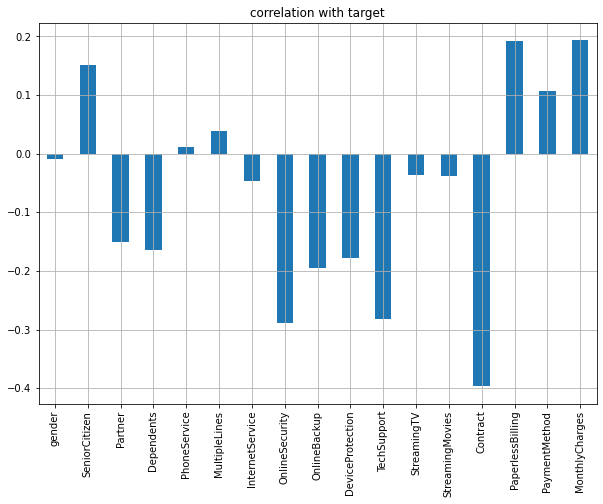

In [99]:
# convert above numbers into graph for better understanding
df.drop('Churn' , axis = 1).corrwith (df.Churn).plot(kind = 'bar' , grid=True , figsize = (10,7) , title = 'correlation with target')

plt.show()

## Scaling the data

In [100]:
#scale our data using standard sclar
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_scaled=scalar.fit_transform(X)

## Checking for the multicollinearity Using VIF

In [101]:
# now we check for multicolinearity using VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()  #creating empty dataframe

vif['vif']=[variance_inflation_factor(X_scaled , i) for i in range(X_scaled.shape[1])]  


# for above code first it will execute for statement and shape[1] give all columns and store in i then it will pass to vif 
##  in that we already have X_scaled so it will compare feature vs feature

vif['features']=X.columns  # seperate column for column features

vif

,vif,features
0,1.001116,gender
1,1.146638,SeniorCitizen
2,1.404216,Partner
3,1.378194,Dependents
4,1.619643,PhoneService
5,1.336290,MultipleLines
6,1.825876,InternetService
7,1.230490,OnlineSecurity
8,1.142471,OnlineBackup
9,1.269322,DeviceProtection


##  we will drop Total Charges and tenure column as VIF is greater than 5 and Selecting all the  remaining features 

In [102]:
df.drop(['TotalCharges','tenure'],axis=1,inplace = True)

## Feature selection with SelectKBest

In [103]:
# selecting 12 best feature 
from sklearn.feature_selection import SelectKBest , f_classif

In [104]:
#select best feature
# selecting 12 best feature 
from sklearn.feature_selection import SelectKBest , f_classif

best_feature = SelectKBest(score_func=f_classif , k=12)

fit = best_feature.fit(X,y)

df_scores = pd.DataFrame(fit.scores_)

df_column = pd.DataFrame(X.columns)

feature_scores = pd.concat ([df_column , df_scores ] , axis =1)

feature_scores.columns=['Feature_Name' , 'Scores']

print (feature_scores.nlargest (12, 'Scores'))

        Feature_Name       Scores
13          Contract  1315.088872
7     OnlineSecurity   643.162019
10       TechSupport   610.610024
8       OnlineBackup   279.877370
16    MonthlyCharges   273.463704
14  PaperlessBilling   268.985218
9   DeviceProtection   230.744618
3         Dependents   195.149314
1      SeniorCitizen   164.041424
2            Partner   163.060036
15     PaymentMethod    81.641664
6    InternetService    15.782320


In [105]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'Churn'],
      dtype='object')

## we selected top 12 feature from feature selection technique

In [106]:
#Model BUilding
new_X = df[['Contract','OnlineSecurity','TechSupport','OnlineBackup','MonthlyCharges','PaperlessBilling','DeviceProtection','Dependents','SeniorCitizen', 'Partner','PaymentMethod','InternetService']]

In [ ]:
y=df.fraud_reported

In [107]:
scalar = StandardScaler()
X_scalar = scalar.fit_transform(new_X)

# DecisionTreeClassifier

In [111]:
#import necessary librarys
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier #if regression then regressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [112]:
#Finding the Best Random State
MaxAccu=0
MaxRS=0

for i in range (1,100):
    X_train_ns,X_test,y_train_ns,y_test=train_test_split(X_scalar,y,test_size=0.25,random_state=i)
    dt=DecisionTreeClassifier()
    dt.fit(X_train_ns,y_train_ns)
    
    y_pred=dt.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    print ('Testing Accuracy' , accuracy , 'RandomState' ,i)
    print('\n')
    
    
    if accuracy>MaxAccu:
        MaxAccu=accuracy
        MaxRS=i
        print('MAXINING TESTING SCORE' , MaxAccu , 'ON RANDOM STATE OF' , i)

Testing Accuracy 0.7359454855195912 RandomState 1


MAXINING TESTING SCORE 0.7359454855195912 ON RANDOM STATE OF 1
Testing Accuracy 0.706984667802385 RandomState 2


Testing Accuracy 0.7132311186825667 RandomState 3


Testing Accuracy 0.7166382737081204 RandomState 4


Testing Accuracy 0.706984667802385 RandomState 5


Testing Accuracy 0.7217490062464509 RandomState 6


Testing Accuracy 0.7160704145371948 RandomState 7


Testing Accuracy 0.7052810902896082 RandomState 8


Testing Accuracy 0.720045428733674 RandomState 9


Testing Accuracy 0.7223168654173765 RandomState 10


Testing Accuracy 0.7137989778534923 RandomState 11


Testing Accuracy 0.7098239636570131 RandomState 12


Testing Accuracy 0.7092561044860874 RandomState 13


Testing Accuracy 0.7194775695627484 RandomState 14


Testing Accuracy 0.6978989210675752 RandomState 15


Testing Accuracy 0.7149346961953436 RandomState 16


Testing Accuracy 0.7155025553662692 RandomState 17


Testing Accuracy 0.7137989778534923 RandomState 

In [113]:
print('Best Accuracy is ' , MaxAccu , 'On Random State' , MaxRS)

Best Accuracy is  0.7467348097671778 On Random State 69


In [114]:
# train test split
X_train_ns,X_test,y_train_ns,y_test=train_test_split(X_scalar,y,test_size=0.25,random_state=69)

In [115]:
#write one function and call as many time as you want
def metric_score (clf,X_train_ns,X_test,y_train_ns,y_test,train=True):
    if train:
        y_pred = clf.predict(X_train_ns)
        print ('====Training Score====')
        print (f"Accuracy score : {accuracy_score(y_train_ns,y_pred)*100:2f}%")
        
    elif train==False:
        pred = clf.predict(X_test)
        print ('====Testing Score====')
        print (f"Accuracy score : {accuracy_score(y_test,pred)*100:2f}%")
        
        print ('\n \n Classification report \n ' , classification_report(y_test,pred,digits=2))

In [116]:
# model initilization
clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train_ns,y_train_ns)

DecisionTreeClassifier()

In [117]:
# call the function
metric_score (clf_dt,X_train_ns,X_test,y_train_ns,y_test,train = True)
metric_score (clf_dt,X_train_ns,X_test,y_train_ns,y_test,train=False)

====Training Score====
Accuracy score : 98.750473%
====Testing Score====
Accuracy score : 73.594549%

 
 Classification report 
                precision    recall  f1-score   support

           0       0.82      0.82      0.82      1313
           1       0.48      0.48      0.48       448

    accuracy                           0.74      1761
   macro avg       0.65      0.65      0.65      1761
weighted avg       0.74      0.74      0.74      1761



## Model Score
    Training Score = 98.750473%
    Testing Score = 73.594549%

## Hyperparameter For DecisionTree Classifier

In [118]:
# we are tuning 4 important hyperparameter rightnow we are passing the different value for both parameter
grid_param = {
                'criterion':['gini','entropy'],
                'max_depth':range(1,30),
                'min_samples_leaf':range(1,5),
                'min_samples_split':range(5,10),
                'max_leaf_nodes':range(1,10)
}

In [119]:
# here we are define some parameter and ask gridsearchcv which one is best
grid_search = GridSearchCV (estimator = clf_dt,param_grid=grid_param,cv=5,n_jobs=-1)

In [120]:
#pass dataset to train 
grid_search.fit(X_train_ns,y_train_ns)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30),
                         'max_leaf_nodes': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(5, 10)})

In [121]:
# see best parameters
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 5, 'max_leaf_nodes': 9, 'min_samples_leaf': 1, 'min_samples_split': 5}


In [122]:
#initiate what new parameter we got

clf_dt=DecisionTreeClassifier(criterion= 'gini', max_depth = 5, min_samples_leaf= 1, min_samples_split= 5)
clf_dt.fit(X_train_ns,y_train_ns)

#i tried different combination and i find this is best parameter so using this instead of gridsearch parameters

DecisionTreeClassifier(max_depth=5, min_samples_split=5)

In [123]:
# call the function
metric_score (clf_dt,X_train_ns,X_test,y_train_ns,y_test,train = True)
metric_score (clf_dt,X_train_ns,X_test,y_train_ns,y_test,train=False)

====Training Score====
Accuracy score : 78.758046%
====Testing Score====
Accuracy score : 77.228847%

 
 Classification report 
                precision    recall  f1-score   support

           0       0.84      0.85      0.85      1313
           1       0.55      0.54      0.55       448

    accuracy                           0.77      1761
   macro avg       0.70      0.70      0.70      1761
weighted avg       0.77      0.77      0.77      1761



## Model Scores With Hyperparameter Tuning
* Training Score = 78.758046%
* Testing Score = 77.228847%

## Cross Validation score for DecisionTree Classifier

In [124]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf_dt,X_scalar,y,cv=6)

array([0.76746167, 0.78449744, 0.78534923, 0.75894378, 0.77597956,
       0.77749361])

In [125]:
cross_val_score(clf_dt,X_scalar,y,cv=6).mean()

0.7749542154466408

## Confusion Matrix DecisionTree Classifier

In [126]:
### if you want to check confusion matrix

y_pred=clf_dt.predict(X_test)
cfm=confusion_matrix(y_test,y_pred)
cfm

array([[1119,  194],
       [ 207,  241]], dtype=int64)

## RandomForestClassifier

In [128]:
#import necessary library

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier #RandomForestRegressor if regression problem
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [129]:
#Finding the Best Random State
MaxAccu=0
MaxRS=0

for i in range (1,100):
    X_train_ns,X_test,y_train_ns,y_test=train_test_split(X_scalar,y,test_size=0.25,random_state=i)
    rf = RandomForestClassifier()
    rf.fit(X_train_ns,y_train_ns)
    
    y_pred=rf.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    print ('Testing Accuracy' , accuracy , 'RandomState' ,i)
    print('\n')
    
    
    if accuracy>MaxAccu:
        MaxAccu=accuracy
        MaxRS=i
        print('MAXINING TESTING SCORE' , MaxAccu , 'ON RANDOM STATE OF' , i)

Testing Accuracy 0.7586598523566156 RandomState 1


MAXINING TESTING SCORE 0.7586598523566156 ON RANDOM STATE OF 1
Testing Accuracy 0.7421919363997729 RandomState 2


Testing Accuracy 0.7546848381601363 RandomState 3


Testing Accuracy 0.7331061896649631 RandomState 4


Testing Accuracy 0.7348097671777399 RandomState 5


Testing Accuracy 0.7444633730834753 RandomState 6


Testing Accuracy 0.7495741056218058 RandomState 7


Testing Accuracy 0.7342419080068143 RandomState 8


Testing Accuracy 0.7444633730834753 RandomState 9


Testing Accuracy 0.7473026689381034 RandomState 10


Testing Accuracy 0.7546848381601363 RandomState 11


Testing Accuracy 0.7421919363997729 RandomState 12


Testing Accuracy 0.7649063032367973 RandomState 13


MAXINING TESTING SCORE 0.7649063032367973 ON RANDOM STATE OF 13
Testing Accuracy 0.7399204997160704 RandomState 14


Testing Accuracy 0.7257240204429302 RandomState 15


Testing Accuracy 0.7535491198182851 RandomState 16


Testing Accuracy 0.741624077228847

In [130]:
print('Best Accuracy is ' , MaxAccu , 'On Random State' , MaxRS)

Best Accuracy is  0.7666098807495741 On Random State 69


In [131]:
# train test split
X_train_ns,X_test,y_train_ns,y_test=train_test_split(X_scalar,y,test_size=0.25,random_state=69)

In [132]:
#write one function and call as many time as you want
def metric_score (clf,X_train_ns,X_test,y_train_ns,y_test,train=True):
    if train:
        y_pred = clf.predict(X_train_ns)
        print ('====Training Score====')
        print (f"Accuracy score : {accuracy_score(y_train_ns,y_pred)*100:2f}%")
        
    elif train==False:
        pred = clf.predict(X_test)
        print ('====Testing Score====')
        print (f"Accuracy score : {accuracy_score(y_test,pred)*100:2f}%")
        
        print ('\n \n Classification report \n ' , classification_report(y_test,pred,digits=2))

In [133]:
# model initilization
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train_ns,y_train_ns)


RandomForestClassifier()

In [134]:
# call the function
metric_score (clf_rf,X_train_ns,X_test,y_train_ns,y_test,train = True)
metric_score (clf_rf,X_train_ns,X_test,y_train_ns,y_test,train=False)

====Training Score====
Accuracy score : 98.750473%
====Testing Score====
Accuracy score : 76.320273%

 
 Classification report 
                precision    recall  f1-score   support

           0       0.83      0.86      0.84      1313
           1       0.54      0.48      0.51       448

    accuracy                           0.76      1761
   macro avg       0.68      0.67      0.68      1761
weighted avg       0.75      0.76      0.76      1761



## Model Scores
    Training Score = 98.750473%
    Testing Score = 76.320273%

## Hyperparameter For RandomForestClassifier 

In [135]:
# we are tuning 4 important hyperparameter rightnow we are passing the different value for both parameter
params_grid = {'n_estimators' : range(1,5),
               'criterion' : ['entropy' , 'gini'],
               'max_depth' : range(1,30),
               'min_samples_split' :range(5,10),
               'min_samples_leaf':range(1,10)}

In [136]:
# here we are define some parameter and ask gridsearchcv which one is best
grd = GridSearchCV(clf_rf,param_grid = params_grid)


In [137]:
#pass dataset to train 
grd.fit(X_train_ns,y_train_ns)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(1, 30),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(5, 10),
                         'n_estimators': range(1, 5)})

In [138]:
print ('Best parameters : ' , grd.best_params_) #printing best parameters

Best parameters :  {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 8, 'min_samples_split': 6, 'n_estimators': 4}


In [139]:
#initiate what new parameter we got
rf=RandomForestClassifier(criterion= 'entropy', max_depth = 7, min_samples_leaf=8, min_samples_split= 6,n_estimators= 4)
rf.fit(X_train_ns,y_train_ns)

#i tried different combination and i find this is best parameter so using this instead of gridsearch parameters

RandomForestClassifier(criterion='entropy', max_depth=7, min_samples_leaf=8,
                       min_samples_split=6, n_estimators=4)

In [140]:
# call the function
metric_score (rf,X_train_ns,X_test,y_train_ns,y_test,train = True)
metric_score (rf,X_train_ns,X_test,y_train_ns,y_test,train=False)

====Training Score====
Accuracy score : 79.193487%
====Testing Score====
Accuracy score : 78.194208%

 
 Classification report 
                precision    recall  f1-score   support

           0       0.84      0.88      0.86      1313
           1       0.58      0.51      0.54       448

    accuracy                           0.78      1761
   macro avg       0.71      0.69      0.70      1761
weighted avg       0.77      0.78      0.78      1761



## Model Scores With Hyperparameter Tuning
    Training Score = 79.193487%
    Testing Score = 78.194208%

## Cross Validation score for RandomForestClassifier

In [141]:
from sklearn.model_selection import cross_val_score
cross_val_score(rf,X_scalar,y,cv=6)

array([0.76916525, 0.78705281, 0.78705281, 0.7725724 , 0.78194208,
       0.7885763 ])

In [142]:
cross_val_score(rf,X_scalar,y,cv=6).mean()

0.7816286181657809

## Confusion Matrix RandomForestClassifier

In [143]:
### if you want to check confusion matrix

y_pred=clf_rf.predict(X_test)
cfm=confusion_matrix(y_test,y_pred)
cfm

array([[1130,  183],
       [ 234,  214]], dtype=int64)

## Support Vector Machine Model

In [144]:
# Import necessary model #
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')
# svc model 
# for classification
from sklearn.svm import SVC

In [145]:
#Finding the Best Random State
MaxAccu=0
MaxRS=0

for i in range (1,100):
    X_train_ns,X_test,y_train_ns,y_test=train_test_split(X_scalar,y,test_size=0.25,random_state=i)
    svc=SVC()
    svc.fit(X_train_ns,y_train_ns)
    
    y_pred=svc.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    print ('Testing Accuracy' , accuracy , 'RandomState' ,i)
    print('\n')
    
    
    if accuracy>MaxAccu:
        MaxAccu=accuracy
        MaxRS=i
        print('MAXINING TESTING SCORE' , MaxAccu , 'ON RANDOM STATE OF' , i)

Testing Accuracy 0.7950028392958546 RandomState 1


MAXINING TESTING SCORE 0.7950028392958546 ON RANDOM STATE OF 1
Testing Accuracy 0.7791027825099376 RandomState 2


Testing Accuracy 0.7910278250993753 RandomState 3


Testing Accuracy 0.7694491766042022 RandomState 4


Testing Accuracy 0.7717206132879046 RandomState 5


Testing Accuracy 0.78137421919364 RandomState 6


Testing Accuracy 0.78137421919364 RandomState 7


Testing Accuracy 0.768313458262351 RandomState 8


Testing Accuracy 0.7722884724588303 RandomState 9


Testing Accuracy 0.7717206132879046 RandomState 10


Testing Accuracy 0.7722884724588303 RandomState 11


Testing Accuracy 0.7734241908006815 RandomState 12


Testing Accuracy 0.7978421351504826 RandomState 13


MAXINING TESTING SCORE 0.7978421351504826 ON RANDOM STATE OF 13
Testing Accuracy 0.7876206700738216 RandomState 14


Testing Accuracy 0.7819420783645656 RandomState 15


Testing Accuracy 0.7864849517319704 RandomState 16


Testing Accuracy 0.7688813174332766 Ran

In [146]:
print('Best Accuracy is ' , MaxAccu , 'On Random State' , MaxRS)

Best Accuracy is  0.7978421351504826 On Random State 13


In [147]:
# train test split
X_train_ns,X_test,y_train_ns,y_test=train_test_split(X_scalar,y,test_size=0.25,random_state=13)

In [148]:
#write one function and call as many time as you want
def metric_score (clf,X_train_ns,X_test,y_train_ns,y_test,train=True):
    if train:
        y_pred = clf.predict(X_train_ns)
        print ('====Training Score====')
        print (f"Accuracy score : {accuracy_score(y_train_ns,y_pred)*100:2f}%")
        
    elif train==False:
        pred = clf.predict(X_test)
        print ('====Testing Score====')
        print (f"Accuracy score : {accuracy_score(y_test,pred)*100:2f}%")
        
        print ('\n \n Classification report \n ' , classification_report(y_test,pred,digits=2))

In [149]:
clf_svc=SVC()
clf_svc.fit(X_train_ns,y_train_ns)

SVC()

In [150]:
# call the function
metric_score (clf_svc,X_train_ns,X_test,y_train_ns,y_test,train = True)
metric_score (clf_svc,X_train_ns,X_test,y_train_ns,y_test,train=False)

====Training Score====
Accuracy score : 78.758046%
====Testing Score====
Accuracy score : 79.784214%

 
 Classification report 
                precision    recall  f1-score   support

           0       0.84      0.91      0.87      1315
           1       0.63      0.48      0.54       446

    accuracy                           0.80      1761
   macro avg       0.74      0.69      0.71      1761
weighted avg       0.79      0.80      0.79      1761



## Model Scores
    Training Score = 78.758046%
    Testing Score = 79.784214%

## Hyperparameter Tuning for SVC

In [151]:
## HYPERPARAMETER TUNING ##
# here we tune only 2 parameter c and gamma
# where c = how much error we allow model to do 
# gamma = it decide how much curvature we want in a decision boundary 

from sklearn.model_selection import GridSearchCV

In [152]:
param_grid={'C':[1,5,10,20],
           'gamma':[0.001,0.01,0.02,0.002]}

In [153]:
# here we are define some parameter and ask gridsearchcv which one is best
gridsearch=GridSearchCV(svc,param_grid)

In [154]:
#pass dataset to train 
gridsearch.fit(X_train_ns,y_train_ns)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 5, 10, 20],
                         'gamma': [0.001, 0.01, 0.02, 0.002]})

In [155]:
#best parameters
gridsearch.best_params_

{'C': 20, 'gamma': 0.01}

In [158]:
# update our model and train again for new score 
svc=SVC(C=20,gamma=0.01)
svc.fit(X_train_ns,y_train_ns)

SVC(C=20, gamma=0.01)

In [159]:
# call the function
metric_score (svc,X_train_ns,X_test,y_train_ns,y_test,train = True)
metric_score (svc,X_train_ns,X_test,y_train_ns,y_test,train=False)

====Training Score====
Accuracy score : 78.114351%
====Testing Score====
Accuracy score : 80.408859%

 
 Classification report 
                precision    recall  f1-score   support

           0       0.84      0.91      0.87      1315
           1       0.65      0.49      0.56       446

    accuracy                           0.80      1761
   macro avg       0.75      0.70      0.72      1761
weighted avg       0.79      0.80      0.79      1761



## Model Scores With Hyperparameter Tuning
    Training Score = 78.114351%
    Testing Score = 80.408859%

## Cross Validation score for SVC

In [160]:
from sklearn.model_selection import cross_val_score
cross_val_score(svc,X_scalar,y,cv=6)

array([0.76916525, 0.79216354, 0.79386712, 0.76746167, 0.77683135,
       0.7885763 ])

In [161]:
cross_val_score(svc,X_scalar,y,cv=6).mean()

0.7813442044719031

## Confusion Matrix for SVC

In [162]:
### if you want to check confusion matrix

y_pred=svc.predict(X_test)
cfm=confusion_matrix(y_test,y_pred)
cfm

array([[1198,  117],
       [ 228,  218]], dtype=int64)

# KNeighborsClassifier Model

In [163]:
#import necessary library

import pandas as pd
import numpy as np 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [164]:
#Finding the Best Random State
MaxAccu=0
MaxRS=0

for i in range (1,100):
    X_train,X_test,y_train,y_test=train_test_split(X_scalar,y,test_size=0.25,random_state=i)
    knn = KNeighborsClassifier()
    knn.fit(X_train,y_train)
    
    y_pred=rf.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    print ('Testing Accuracy' , accuracy , 'RandomState' ,i)
    print('\n')
    
    
    if accuracy>MaxAccu:
        MaxAccu=accuracy
        MaxRS=i
        print('MAXINING TESTING SCORE' , MaxAccu , 'ON RANDOM STATE OF' , i)

Testing Accuracy 0.8023850085178875 RandomState 1


MAXINING TESTING SCORE 0.8023850085178875 ON RANDOM STATE OF 1
Testing Accuracy 0.7898921067575241 RandomState 2


Testing Accuracy 0.8029528676888131 RandomState 3


MAXINING TESTING SCORE 0.8029528676888131 ON RANDOM STATE OF 3
Testing Accuracy 0.7705848949460534 RandomState 4


Testing Accuracy 0.7921635434412265 RandomState 5


Testing Accuracy 0.7967064168086314 RandomState 6


Testing Accuracy 0.794434980124929 RandomState 7


Testing Accuracy 0.7773992049971608 RandomState 8


Testing Accuracy 0.7773992049971608 RandomState 9


Testing Accuracy 0.7876206700738216 RandomState 10


Testing Accuracy 0.7853492333901193 RandomState 11


Testing Accuracy 0.7779670641680864 RandomState 12


Testing Accuracy 0.8080636002271436 RandomState 13


MAXINING TESTING SCORE 0.8080636002271436 ON RANDOM STATE OF 13
Testing Accuracy 0.8012492901760363 RandomState 14


Testing Accuracy 0.7927314026121521 RandomState 15


Testing Accuracy 0.795570

In [165]:
print('Best Accuracy is ' , MaxAccu , 'On Random State' , MaxRS)

Best Accuracy is  0.8131743327654741 On Random State 58


In [166]:
X_train_ns,X_test,y_train_ns,y_test=train_test_split(X_scalar,y,test_size=0.25,random_state=58)

In [170]:
#write one function and call as many time as you want
def metric_score (clf,X_train_ns,X_test,y_train_ns,y_test,train=True):
    if train:
        pred = clf.predict(X_train_ns)
        print ('====Training Score====')
        print (f"Accuracy score : {accuracy_score(y_train_ns,pred)*100:2f}%")
        
    elif train==False:
        y_pred = clf.predict(X_test)
        print ('====Testing Score====')
        print (f"Accuracy score : {accuracy_score(y_test,y_pred)*100:2f}%")
        
        print ('\n \n Classification report \n ' , classification_report(y_test,y_pred,digits=2))

In [171]:
# model initilization
clf_knn = KNeighborsClassifier()
clf_knn.fit(X_train_ns,y_train_ns)


KNeighborsClassifier()

In [172]:
# call the function
metric_score (clf_knn,X_train_ns,X_test,y_train_ns,y_test,train = True)
metric_score (clf_knn,X_train_ns,X_test,y_train_ns,y_test,train=False)

====Training Score====
Accuracy score : 82.563423%
====Testing Score====
Accuracy score : 75.184554%

 
 Classification report 
                precision    recall  f1-score   support

           0       0.81      0.86      0.84      1290
           1       0.54      0.46      0.50       471

    accuracy                           0.75      1761
   macro avg       0.68      0.66      0.67      1761
weighted avg       0.74      0.75      0.74      1761



## Model Scores
    Training Score = 82.563423%
    Testing Score = 75.184554%

## Hyperparameter For KNeighborsClassifier

In [173]:
from sklearn.model_selection import GridSearchCV
param_grid={'algorithm':['kd_tree','brute'],
            'leaf_size':[3,5,6,7,8],
            'n_neighbors':[3,5,7,9,11,13]}

In [174]:
# now call grid search and say that we are going to use knn model

gridsearch=GridSearchCV(estimator=clf_knn , param_grid=param_grid)

In [175]:
#give the data to object
gridsearch.fit(X_train_ns,y_train_ns)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [3, 5, 6, 7, 8],
                         'n_neighbors': [3, 5, 7, 9, 11, 13]})

In [176]:
#see the best paramater
gridsearch.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 5, 'n_neighbors': 13}

In [177]:
# we will use the best parameter in our knn algorithm and check if accuracy is increase or not
clf_knn=KNeighborsClassifier(algorithm = 'kd_tree', leaf_size = 5, n_neighbors = 13)

clf_knn.fit(X_train_ns,y_train_ns)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=5, n_neighbors=13)

In [178]:
# call the function
metric_score (clf_knn,X_train_ns,X_test,y_train_ns,y_test,train = True)
metric_score (clf_knn,X_train_ns,X_test,y_train_ns,y_test,train=False)

====Training Score====
Accuracy score : 80.045437%
====Testing Score====
Accuracy score : 77.796706%

 
 Classification report 
                precision    recall  f1-score   support

           0       0.82      0.89      0.85      1290
           1       0.61      0.48      0.54       471

    accuracy                           0.78      1761
   macro avg       0.72      0.68      0.70      1761
weighted avg       0.77      0.78      0.77      1761



## Model Scores With Hyperparameter Tuning
    Training Score = 80.045437%
    Testing Score = 77.796706%

## Cross Validation score for KNN

In [179]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf_knn,X_scalar,y,cv=6)

array([0.75894378, 0.79131175, 0.78279387, 0.75809199, 0.77001704,
       0.77237852])

In [180]:
cross_val_score(clf_knn,X_scalar,y,cv=6).mean()

0.7722561582221216

## Confusion Matric for KNN

In [181]:
### if you want to check confusion matrix

y_pred=clf_knn.predict(X_test)
cfm=confusion_matrix(y_test,y_pred)
cfm

array([[1144,  146],
       [ 245,  226]], dtype=int64)

# Plot AUC-ROC curve for above 4-Models

In [182]:
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import plot_roc_curve

## AUC-ROC Curve for Training Data

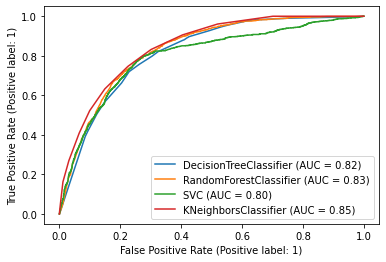

In [183]:
# how well our model works on training data 

disp = plot_roc_curve(clf_dt,X_train_ns,y_train_ns)

plot_roc_curve(rf,X_train_ns,y_train_ns,ax=disp.ax_)

plot_roc_curve(svc,X_train_ns,y_train_ns,ax=disp.ax_)

plot_roc_curve(clf_knn,X_train_ns,y_train_ns,ax=disp.ax_)

plt.legend (prop = {'size':10} , loc='lower right')

plt.show()


## AUC-ROC Curve for Testing Data

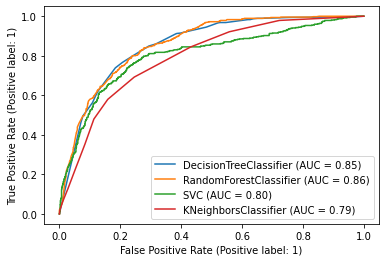

In [184]:
# how well our model works on testing data 

disp = plot_roc_curve(clf_dt,X_test,y_test)

plot_roc_curve(rf,X_test,y_test,ax=disp.ax_)

plot_roc_curve(svc,X_test,y_test,ax=disp.ax_)

plot_roc_curve(clf_knn,X_test,y_test,ax=disp.ax_)

plt.legend (prop = {'size':10} , loc='lower right')

plt.show()

In [185]:
clf_dt=DecisionTreeClassifier(criterion= 'gini', max_depth = 5, min_samples_leaf= 1, min_samples_split= 5)
clf_dt.fit(X_train_ns,y_train_ns)


DecisionTreeClassifier(max_depth=5, min_samples_split=5)

In [186]:
rf=RandomForestClassifier(criterion= 'entropy', max_depth = 7, min_samples_leaf=8, min_samples_split= 6,n_estimators= 4)
rf.fit(X_train_ns,y_train_ns)

RandomForestClassifier(criterion='entropy', max_depth=7, min_samples_leaf=8,
                       min_samples_split=6, n_estimators=4)

In [187]:
svc=SVC(C=20,gamma=0.01)
svc.fit(X_train_ns,y_train_ns)

SVC(C=20, gamma=0.01)

In [188]:
clf_knn=KNeighborsClassifier(algorithm = 'kd_tree', leaf_size = 5, n_neighbors = 13)

clf_knn.fit(X_train_ns,y_train_ns)


KNeighborsClassifier(algorithm='kd_tree', leaf_size=5, n_neighbors=13)

## AUC-ROC Curve for Training Data With Hyperparameter Tuning

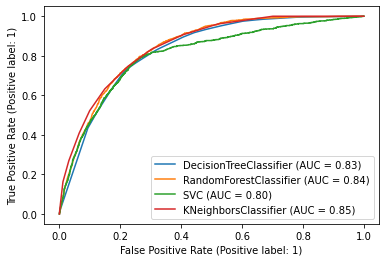

In [189]:
# how well our model works on training data 

disp = plot_roc_curve(clf_dt,X_train_ns,y_train_ns)

plot_roc_curve(rf,X_train_ns,y_train_ns,ax=disp.ax_)

plot_roc_curve(svc,X_train_ns,y_train_ns,ax=disp.ax_)

plot_roc_curve(clf_knn,X_train_ns,y_train_ns,ax=disp.ax_)

plt.legend (prop = {'size':10} , loc='lower right')

plt.show()


## AUC-ROC Curve for Testing Data With Hyperparameter Tuning

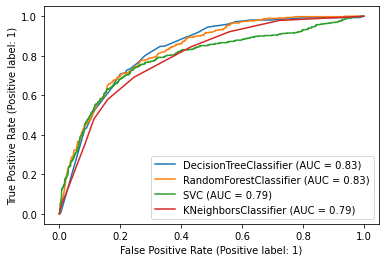

In [190]:
# how well our model works on testing data 

disp = plot_roc_curve(clf_dt,X_test,y_test)

plot_roc_curve(rf,X_test,y_test,ax=disp.ax_)

plot_roc_curve(svc,X_test,y_test,ax=disp.ax_)

plot_roc_curve(clf_knn,X_test,y_test,ax=disp.ax_)

plt.legend (prop = {'size':10} , loc='lower right')

plt.show()

## From All 4 Models and AUC-ROC Curve, we observe Decision Tree is best suited for this problem as after hyperparameter tuning the training score is 83% and the testing score is 83% so selecting Decision Tree Model for this particular Problem.

## Saving the Best Model

In [191]:
# now we save this is modeland transfer to other by using pickel

#first save this model to the local file system 
import pickle
pickle.dump(clf_dt , open ('reg_model' , 'wb'))